In [59]:
import os
import ccxt
from dataclasses import dataclass
import dataclasses
import typing
import datetime
import numpy as np
from math import floor
liquid = ccxt.liquid({
    'apiKey': '1800187',
    'secret': 'XU5Uf9Dc15SNWD4POVhu1rQOGrIuToO/01AI4nXrOKfBOt4bM4827U6E5fYnH08pnGaRVZ13GnSdQajfNrtpFg=='
})


x = pd.read_csv("transaction_liquid.csv")

x.drop_duplicates().sort_values('time', ascending = False)

In [170]:
import matplotlib.pyplot as plt

In [197]:
def get_cum_profit():
    x = pd.read_csv("bal.csv")

    x = x.sort_values('time')

    x['price_change'] = x.price_jpy.pct_change()
    x['bal_change'] = x.total.pct_change()
    x['relative_profit'] = x['bal_change'] - 0.5 * x['price_change']

    x['price_cum_change'] = x['price_change'].cumsum()
    x['bal_cum_change'] = x['bal_change'].cumsum()
    x['relative_cum_profit'] = x['bal_cum_change'] - 0.5 * x['price_cum_change']
    x['bal_ratio'] = x['ETH'] * x['price_jpy'] / x['total']

    return x.sort_values('time', ascending = False)

<AxesSubplot:xlabel='time'>

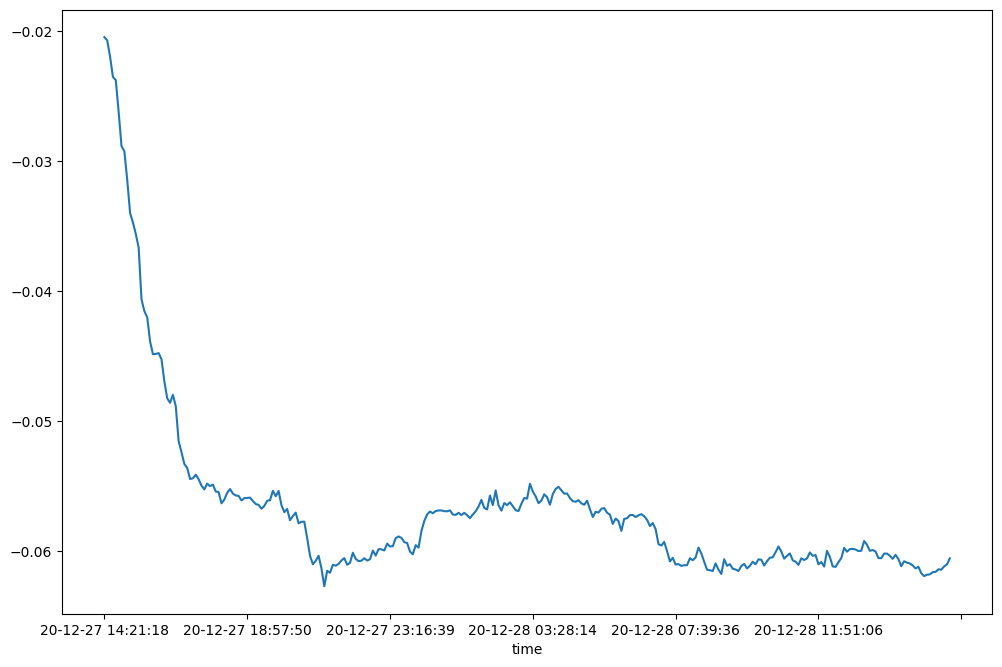

In [286]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
x = get_cum_profit().sort_values('time')
x[x['time'] > '20-12-27 14:17:53'].set_index('time')['relative_cum_profit'].plot()

In [282]:
x

,JPY,ETH,total,total_USD,price_jpy,price_usd,time,utc,price_change,bal_change,relative_profit,price_cum_change,bal_cum_change,relative_cum_profit,bal_ratio
355,33024.83853,0.935286,93225.436609,900.7,64366.0,621.9,20-12-26 13:57:45,1.608991e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.645753
354,17508.68494,1.174392,93213.485494,900.6,64463.0,622.8,20-12-26 14:02:48,1.608991e+09,0.001507,-0.000128,-0.000882,0.001507,-0.000128,-0.000882,0.812166
353,8408.55571,1.315273,92917.455303,897.7,64252.0,620.8,20-12-26 14:07:50,1.608992e+09,-0.003273,-0.003176,-0.001539,-0.001766,-0.003304,-0.002421,0.909505
352,8408.55571,1.315273,93671.106543,905.0,64825.0,626.3,20-12-26 14:12:51,1.608992e+09,0.008918,0.008111,0.003652,0.007152,0.004807,0.001231,0.910233
351,8408.55571,1.315273,94623.363956,914.2,65549.0,633.3,20-12-26 14:17:53,1.608992e+09,0.011169,0.010166,0.004582,0.018320,0.014973,0.005813,0.911137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,35901.20996,0.795366,93815.820929,906.5,72815.0,703.6,20-12-27 19:54:36,1.609099e+09,-0.003503,-0.002166,-0.000414,0.126319,0.007372,-0.055788,0.617322
3,35901.20996,0.795366,94013.867185,908.4,73064.0,705.9,20-12-27 19:59:40,1.609099e+09,0.003420,0.002111,0.000401,0.129739,0.009483,-0.055387,0.618129
2,35901.20996,0.795366,93475.404072,902.5,72387.0,698.9,20-12-27 20:04:41,1.609099e+09,-0.009266,-0.005727,-0.001095,0.120473,0.003756,-0.056481,0.615929
1,35901.20996,0.795366,93208.956297,899.9,72052.0,695.6,20-12-27 20:09:45,1.609100e+09,-0.004628,-0.002850,-0.000537,0.115845,0.000905,-0.057018,0.614831


In [242]:
x.sort_values('price_change')

,JPY,ETH,total,total_USD,price_jpy,price_usd,time,utc,price_change,bal_change,relative_profit,price_cum_change,bal_cum_change,relative_cum_profit,bal_ratio
11,23412.36999,1.067124,93399.727699,902.4,65585.0,633.6,20-12-27 11:40:22,1.609069e+09,-0.015462,-0.010783,-0.003052,0.020127,0.002510,-0.007553,0.749331
5,32945.98137,0.916809,92284.593449,891.6,64723.0,625.3,20-12-27 12:10:32,1.609071e+09,-0.013880,-0.008280,-0.001340,0.007024,-0.009456,-0.012968,0.642996
243,8408.55571,1.315273,94057.796708,908.7,65119.0,629.1,20-12-26 16:13:37,1.608999e+09,-0.011071,-0.010091,-0.004556,0.011910,0.009120,0.003165,0.910602
43,23697.94609,1.064164,94725.576275,915.2,66745.0,644.9,20-12-27 08:59:28,1.609060e+09,-0.010496,-0.007168,-0.001920,0.037469,0.016535,-0.002199,0.749825
265,8408.55571,1.315273,93747.392358,905.7,64883.0,626.9,20-12-26 14:22:55,1.608993e+09,-0.010160,-0.009257,-0.004177,0.008160,0.005715,0.001635,0.910306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,8408.55571,1.315273,94623.363956,914.2,65549.0,633.3,20-12-26 14:17:53,1.608992e+09,0.011169,0.010166,0.004582,0.018320,0.014973,0.005813,0.911137
4,52432.07456,0.614187,92644.137609,895.1,65472.0,632.6,20-12-27 12:15:34,1.609071e+09,0.011572,0.003896,-0.001890,0.018596,-0.005560,-0.014858,0.434049
72,44200.66389,0.760003,95826.892733,925.8,67929.0,656.3,20-12-27 06:33:38,1.609051e+09,0.011601,0.005852,0.000052,0.054932,0.028044,0.000578,0.538745
241,25585.39918,1.052218,95628.404105,923.9,66567.0,643.1,20-12-26 16:23:41,1.609000e+09,0.014633,0.010676,0.003360,0.034037,0.025755,0.008737,0.732450


In [240]:
x.tail(40)[['price_change', 'relative_profit']].corr()

,price_change,relative_profit
price_change,1.000000,0.136883
relative_profit,0.136883,1.000000


In [264]:
def get_vwap(n):
    y = pd.read_csv('transaction_liquid.csv')
    
    y = y.head(n)
    y['type_bool'] = y['type'].apply(lambda x: 1 if x == 'buy' else -1) 

    y['abs'] = y['type_bool'] * y['amount'] * y['price']

    y_buy = y[y['abs'] > 0]
    b_vwap = y_buy['abs'].sum()/y_buy['amount'].sum()

    y_sell = y[y['abs'] < 0]
    s_vwap = - y_sell['abs'].sum()/y_sell['amount'].sum()
    return b_vwap,s_vwap, s_vwap - b_vwap

In [265]:
get_vwap(200)

(71555.9083989766, 71569.80418622518, 13.89578724859166)

In [294]:
spread_list = []
for n in range(200):
    x,y,z = get_vwap(n)
    spread_list.append(z)
    

/Users/Zi/napoli_gang/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/Users/Zi/napoli_gang/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/Users/Zi/napoli_gang/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/Users/Zi/napoli_gang/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/Users/Zi/napoli_gang/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [295]:
spread_list

[nan,
 nan,
 nan,
 nan,
 574.1814597464981,
 754.5307840975584,
 481.12186891489546,
 325.36796333637903,
 348.175157509424,
 339.8880593157228,
 353.49144003368565,
 365.8511281760002,
 298.676213256389,
 163.92474548514292,
 91.3970701602957,
 58.89591452883906,
 -89.82292797393166,
 -304.41476828484156,
 1.2054070963640697,
 192.21942507193307,
 93.98994375322945,
 -34.64681353075139,
 -138.64041072841792,
 -335.65111029364925,
 -108.29306408591219,
 -312.6679605853569,
 -634.9241665914597,
 -454.7056951967097,
 -617.0749113635393,
 -541.2447329506249,
 -498.80243160885584,
 -390.60197930122376,
 -288.73910562148376,
 -218.12608042503416,
 -261.16887302203395,
 -141.50548812453053,
 -78.57469421807036,
 -93.75001656881068,
 -121.3109271844005,
 -175.11796785060142,
 -242.17878244645544,
 -340.18438568437705,
 -229.59935067301558,
 -309.95254080915765,
 -174.53033268032596,
 -274.9985979310295,
 -181.18884395896748,
 -288.8369839985098,
 -448.35868957480125,
 -467.611315847942,
 -404

In [215]:
y.head(20)['abs'].sum()

-27513.716406100004

In [161]:
!pip install matplotlib

     |████████████████████████████████| 8.5 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 1.7 MB/s eta 0:00:01


In [65]:
    all_orders = []
    now = exchange.milliseconds()
    since =  now - 86400000 * 5  # -1 day from now
    print(since)
    print(now)
    while since < now:
        symbol = 'ETH/JPY'  # change for your symbol
        limit = 20  # change for your limit
        orders = exchange.fetch_my_trades(symbol, since, limit)
        if len(orders) > 1:
            since = orders[len(orders) - 1]['timestamp']
            print(since)
            all_orders += orders
        else:
            break

1608538677574
1608970677574
1608970472000


In [63]:
len(all_orders)

20

In [73]:
exchange.parse8601('2020-12-21T00:00:00Z')

1514764800000

In [107]:
x = exchange.fetch_my_trades(symbol, limit = 100)

In [109]:
0.08777354 * 63907.0

5609.34362078

In [108]:
x

[{'info': {'id': 391492520,
   'quantity': '0.08777354',
   'price': '63907.0',
   'taker_side': 'buy',
   'created_at': 1608981462,
   'timestamp': '1608981462.439798',
   'my_side': 'buy',
   'order_id': 3682100533,
   'client_order_id': None,
   'pnl': None,
   'target': 'spot'},
  'id': '391492520',
  'order': '3682100533',
  'timestamp': 1608981462000,
  'datetime': '2020-12-26T11:17:42.000Z',
  'symbol': 'ETH/JPY',
  'type': None,
  'side': 'buy',
  'takerOrMaker': 'taker',
  'price': 63907.0,
  'amount': 0.08777354,
  'cost': 5609.34362078,
  'fee': None},
 {'info': {'id': 391492630,
   'quantity': '0.19391347',
   'price': '63929.0',
   'taker_side': 'buy',
   'created_at': 1608981478,
   'timestamp': '1608981478.3575838',
   'my_side': 'sell',
   'order_id': 3682100831,
   'client_order_id': None,
   'pnl': None,
   'target': 'spot'},
  'id': '391492630',
  'order': '3682100831',
  'timestamp': 1608981478000,
  'datetime': '2020-12-26T11:17:58.000Z',
  'symbol': 'ETH/JPY',
  '

In [75]:
exchange = liquid
symbols = ['JPY', 'ETH']
raw_data = exchange.fetch_balance()
position = {symbol: raw_data['total'][symbol] for symbol in symbols}

In [6]:
raw_data = liquid.fetch_balance()

In [79]:
position

{'JPY': 32709.25357, 'ETH': 0.94986832, 'TOTAL': 654185.0714}

In [78]:
position['TOTAL'] = position['JPY']* 20

In [81]:
import requests
def get_fx(currency_f):
    fx = requests.get(
        'https://apilayer.net/api/live?access_key=a1d6d82a3df7cf7882c9dd2b35146d6e&source=USD&format=1').json()
    return fx['quotes']['USD' + currency_f.upper()]

get_fx('JPY')

103.503806

In [85]:
x

{'JPY': 51722.28829,
 'ETH': 0.65691573,
 'TOTAL': 94392.90644788,
 'TOTAL_USD': 911.9752219341577,
 'TIME': '20-12-26 09:06:49',
 'TIMESTAMP': 1608973609.388893}

In [82]:
x = {'JPY': 51722.28829, 'ETH': 0.65691573, 'TOTAL': 94392.90644788, 'TOTAL_USD': 911.9752219341577, 'TIME': '20-12-26 09:06:49', 'TIMESTAMP': 1608973609.388893}

In [94]:
pd.DataFrame(x, index=[0]).to_csv(index = False, header=None)

'51722.28829,0.65691573,94392.90644788,911.9752219341577,20-12-26 09:06:49,1608973609.388893\n'

In [93]:
pd.DataFrame(x, index=[0])

,JPY,ETH,TOTAL,TOTAL_USD,TIME,TIMESTAMP
0,51722.28829,0.656916,94392.906448,911.975222,20-12-26 09:06:49,1.608974e+09


In [16]:
liquid.fetch_my_trades(symbol = 'ETH/JPY', limit = 1, since = liquid.milliseconds () - 86400000* 30)

[{'info': {'id': 390491064,
   'quantity': '0.01',
   'price': '64670.0',
   'taker_side': 'sell',
   'created_at': 1608672330,
   'timestamp': '1608672330.27788',
   'my_side': 'buy',
   'order_id': 3664950929,
   'client_order_id': None,
   'pnl': None,
   'target': 'spot'},
  'id': '390491064',
  'order': '3664950929',
  'timestamp': 1608672330000,
  'datetime': '2020-12-22T21:25:30.000Z',
  'symbol': 'ETH/JPY',
  'type': None,
  'side': 'buy',
  'takerOrMaker': 'maker',
  'price': 64670.0,
  'amount': 0.01,
  'cost': 646.7,
  'fee': None}]

In [15]:
liquid.milliseconds () - 86400000* 30

1606081080416

In [17]:
exchange = liquid

In [48]:
df = pd.DataFrame(columns=['utc','time','type','amount','price','fee'])  
df

,utc,time,type,amount,price,fee


In [46]:
import pandas as pd

In [57]:
df.loc[len(df.index)] = x.split(",")

In [58]:
df

,utc,time,type,amount,price,fee
0,1608672330000,2020-12-22 21:25:30.000000,buy,0.01,64670.0,None


In [49]:
x = '1608672330000,2020-12-22 21:25:30.000000,buy,0.01,64670.0,None'



In [41]:

since = exchange.milliseconds () - 86400000  # -1 day from now
# alternatively, fetch from a certain starting datetime
# since = exchange.parse8601('2018-01-01T00:00:00Z')
all_orders = []
while since < exchange.milliseconds ():
    symbol = 'ETH/JPY'  # change for your symbol
    limit = 20  # change for your limit
    orders =  exchange.fetch_my_trades(symbol, since, limit)
    if len(orders) > 1:
        since = orders[len(orders) - 1]['timestamp']
        all_orders += orders
    else:
        break

In [43]:
all_orders

[{'info': {'id': 390487213,
   'quantity': '0.01',
   'price': '64668.0',
   'taker_side': 'sell',
   'created_at': 1608670056,
   'timestamp': '1608670056.168742',
   'my_side': 'buy',
   'order_id': 3664869801,
   'client_order_id': None,
   'pnl': None,
   'target': 'spot'},
  'id': '390487213',
  'order': '3664869801',
  'timestamp': 1608670056000,
  'datetime': '2020-12-22T20:47:36.000Z',
  'symbol': 'ETH/JPY',
  'type': None,
  'side': 'buy',
  'takerOrMaker': 'maker',
  'price': 64668.0,
  'amount': 0.01,
  'cost': 646.6800000000001,
  'fee': None},
 {'info': {'id': 390488003,
   'quantity': '0.01',
   'price': '64685.0',
   'taker_side': 'buy',
   'created_at': 1608670393,
   'timestamp': '1608670393.784328',
   'my_side': 'sell',
   'order_id': 3664887214,
   'client_order_id': None,
   'pnl': None,
   'target': 'spot'},
  'id': '390488003',
  'order': '3664887214',
  'timestamp': 1608670393000,
  'datetime': '2020-12-22T20:53:13.000Z',
  'symbol': 'ETH/JPY',
  'type': None,
 

In [25]:
exchange.milliseconds ()

1608673383616

In [39]:
orders =  exchange.fetch_my_trades(symbol, since, limit)

In [40]:
len(orders)

1

In [37]:
since = orders[len(orders) - 1]['timestamp']

In [38]:
since

1608672330000

In [21]:
@dataclass
class SymbolRisk:
    qty: int
    start_price: int

In [318]:
liquid.fetch_balance()['total']['ETH']

1.19

In [3]:
raw_data

{'info': {'crypto_accounts': [{'id': 1753586,
    'currency': 'QASH',
    'balance': '0.00016671',
    'reserved_balance': '0.0',
    'pusher_channel': 'user_577085_account_qash',
    'lowest_offer_interest_rate': None,
    'highest_offer_interest_rate': None,
    'address': '0xabec59529219066c213acaf8f2b93f2b32e61093',
    'currency_symbol': 'Ꝗ',
    'minimum_withdraw': None,
    'currency_type': 'crypto'},
   {'id': 1399983,
    'currency': 'BTC',
    'balance': '0.0',
    'reserved_balance': '0.0',
    'pusher_channel': 'user_577085_account_btc',
    'lowest_offer_interest_rate': '0.00001',
    'highest_offer_interest_rate': '0.00200',
    'address': '0',
    'currency_symbol': '₿',
    'minimum_withdraw': '0.02',
    'currency_type': 'crypto'},
   {'id': 1399984,
    'currency': 'ETH',
    'balance': '1.49',
    'reserved_balance': '0.0',
    'pusher_channel': 'user_577085_account_eth',
    'lowest_offer_interest_rate': '0.00001',
    'highest_offer_interest_rate': '0.00200',
    '

In [16]:
symbols = ['ETH']

In [17]:
position = { symbol: raw_data['total'][symbol] for symbol in symbols }

In [18]:
position

{'ETH': 1.49}

In [10]:
liquid.fetch_ticker('ETH/JPY')['last']

68188.0

In [ ]:
current_risk = {position}

In [23]:
current_risk = {'ETH' :SymbolRisk(position['ETH'], liquid.fetch_ticker('ETH/JPY')['last'])}

In [24]:
current_risk

{'ETH': SymbolRisk(qty=1.49, start_price=68252.0)}

In [192]:
@dataclass
class RiskTolerance:
    max_risk_per_trade: int
    max_net_risk: typing.Dict[str, int]
    risk_aversion: typing.Dict[str, float]

In [193]:
def initialise_risk_tolerances(current_risk) -> RiskTolerance:
    max_risk_per_trade = 10000 #jpy
    max_net_risk = {'ETH': 30000}
    risk_aversion = {sym: np.log(max_risk_per_trade/current_risk[sym].start_price/max_net_risk[sym] ) for sym in current_risk.keys()} #-12
    return RiskTolerance(max_risk_per_trade = max_risk_per_trade,
                         max_net_risk = max_net_risk,
                         risk_aversion = risk_aversion)

In [279]:
@dataclass
class RiskServer:
    risk_tolerance: RiskTolerance
    current_risk: typing.Dict[str,SymbolRisk]
        
        
    def get_net_risk(self) -> float:
        return sum(self.current_risk[sym].qty * self.current_risk[sym].start_price for sym in self.current_risk.keys())
    
    def get_trading_risk(self, sym:str) -> float:
        return self.current_risk[sym].qty * self.current_risk[sym].start_price 
    
    def get_quantity(self, sym: str) -> typing.Tuple[float, float]:
        risk = self.get_trading_risk(sym) # if pos > 0 , risk < 0 
        q_0 = self.risk_tolerance.max_risk_per_trade/self.current_risk[sym].start_price # base quantiy 
        if risk >= 0:
            bid_qty = q_0 # q_0 * np.exp(self.risk_tolerance.risk_aversion[sym] * risk) # less than q_0 -> bid less 
            ask_qty = q_0
        else:
            bid_qty = q_0
            ask_qty = q_0 * np.exp(-self.risk_tolerance.risk_aversion[sym] * risk)
        return bid_qty, ask_qty


In [280]:
@dataclass
class Book:
    sym: str
    raw_data:dict


@dataclass
class Level:
    price: float
    qrt:float

In [281]:
@dataclass
class Market:
    raw_data: dict
    time_stamp: str = dataclasses.field(default_factory=lambda: datetime.datetime.now().isoformat())
    books: typing.Dict[str,Book] = dataclasses.field(init = False, hash = False)
        
    def __post_init__(self):
        object.__setattr__(self,'books', {sym: Book(sym, self.raw_data[sym]) for sym in self.raw_data.keys()})
        
    def get_touch(self,sym:str) -> typing.Tuple[Level, Level]:
        return self.books[sym].raw_data['bids'][0], self.books[sym].raw_data['asks'][0]
    
    def get_weighted_fair(self, sym:str, num_levels: int):
        bids = self.books[sym].raw_data['bids'][:num_levels]
        asks = self.books[sym].raw_data['asks'][:num_levels]
        fair_values = []
        for i in range(num_levels):
            bid, ask  = bids[i], asks[i]
            fair = ((bid[0] * ask[1] + bid[1] * ask[0])) / (bid[1] + ask[1])
            fair_values.append(fair)
        final_fair = np.mean(fair_values)
        # return the fair (in the middle), BB,BO
        return max(min(final_fair, asks[0][0]), bids[0][0]), bids[0][0], asks[0][0] 
            
          

In [282]:
def get_market_snap(session, symbols) -> Market:
    raw_data = {sym: session.fetch_order_book(sym + '/JPY') for sym in symbols}
    return Market(raw_data)

In [416]:
liquid.fetch_balance()['total']

{'QASH': 0.00016671,
 'BTC': 0.0,
 'ETH': 1.24609203,
 'XRP': 0.0,
 'AUD': 0.0,
 'JPY': 16693.3032,
 'USD': 0.10013}

In [418]:
1.2 * 66000/ (1.2 * 66000 + 16693.3032)

0.8259179458529696

In [283]:
def update_risk_server(session, risk_tolerance:RiskTolerance) -> RiskServer:
    symbols = ['ETH']
    raw_data = session.fetch_balance()
    position = { symbol: raw_data['total'][symbol] for symbol in symbols }
    price = session.fetch_ticker('ETH/JPY')['last']
    current_risk = {'ETH':SymbolRisk(position['ETH'], price)}
    return RiskServer(risk_tolerance, current_risk)
    

In [284]:
riskTolerance = initialise_risk_tolerances(current_risk)

risk = update_risk_server(liquid, riskTolerance)

risk.get_net_risk()

In [287]:
def get_mm_price(sym:str, mkt_snap, risk) -> typing.Tuple[float,float]:
    bal_ratio = float(risk.get_trading_risk(sym)/risk.risk_tolerance.max_net_risk[sym])
    if abs(bal_ratio)<0.2:
        bal_ratio_step = 0
    elif abs(bal_ratio)< 0.5:
        bal_ratio_step = bal_ratio * 0.2
    elif abs(bal_ratio)< 0.8:
        bal_ratio_step = bal_ratio * 0.5
    else:
        bal_ratio_step = 1
        
    fair_price, bid_px, ask_px = mkt_snap.get_weighted_fair(sym, 3)
    spread = ask_px - bid_px
    
    bid_without_risk_adjust = fair_price - spread/2
    ask_without_risk_adjust = fair_price + spread/2
    
    if bal_ratio >= 0 :
        bid_price = bid_without_risk_adjust * (1 - bal_ratio_step * 0.01)
        if bid_price > bid_px:
            bid_price = bid_px
        ask_price = ask_without_risk_adjust
        if ask_price < ask_px:
            ask_price = ask_px
            
    else:
        bid_price = bid_without_risk_adjust
        if bid_price > bid_px:
            bid_price = bid_px
        ask_price = ask_without_risk_adjust * (1 - bal_ratio_step * 0.01)
        if as_price < ask_px:
            ask_price = ask_px
            
    return round(bid_price,2), round(ask_price,2)
                
            

In [379]:
liquid.fetch_open_orders()

[{'id': '3655196401',
  'clientOrderId': None,
  'timestamp': 1608463561000,
  'datetime': '2020-12-20T11:26:01.000Z',
  'lastTradeTimestamp': None,
  'type': 'limit',
  'timeInForce': None,
  'postOnly': None,
  'status': 'open',
  'symbol': 'ETH/JPY',
  'side': 'buy',
  'price': 66606.0,
  'stopPrice': None,
  'amount': 0.01,
  'filled': 0.0,
  'cost': None,
  'remaining': 0.01,
  'average': 0.0,
  'trades': [],
  'fee': {'currency': 'JPY', 'cost': 0.0},
  'info': {'id': 3655196401,
   'order_type': 'limit',
   'quantity': '0.01',
   'disc_quantity': '0.0',
   'iceberg_total_quantity': '0.0',
   'side': 'buy',
   'filled_quantity': '0.0',
   'price': '66606.0',
   'created_at': 1608463561,
   'updated_at': 1608463561,
   'status': 'live',
   'leverage_level': 1,
   'source_exchange': 0,
   'product_id': 29,
   'margin_type': None,
   'take_profit': None,
   'stop_loss': None,
   'trading_type': 'spot',
   'product_code': 'CASH',
   'funding_currency': 'JPY',
   'crypto_account_id': N

In [380]:
open_orders = liquid.fetch_open_orders()

for open_order in open_orders:
    liquid.cancel_order(open_order['id'])

In [288]:
mkt_snap = get_market_snap(liquid, symbols)

get_mm_price('ETH', mkt_snap,risk)

In [312]:
def make_markets(session, mkt_snap, risk, orders) -> dict:
    for sym in orders.keys():
        bid, ask = get_mm_price(sym, mkt_snap,risk)
        bid_qty, ask_qty = risk.get_quantity(sym)
        print(bid, ask,bid_qty, ask_qty)
    if orders[sym]:
        order_info = orders[sym]
        open_orders = liquid.fetch_open_orders(symbol='ETH/JPY')
        
#         bid_status = session.
        
    else:
        orders[sym]['orders'] = session.create_order(
        
        symbol= 'ETH/JPY',
        type= 'limit',
        side= 'buy',
        amount= bid_qty,
        price=bid
            
        ), 
        orders[sym]['orders'] = session.create_order(
        
        symbol= 'ETH/JPY',
        type= 'limit',
        side= 'sell',
        amount= ask_qty,
        price=ask
            
        )

In [ ]:
mkt_snaps = []



In [350]:
orders_info = liquid.fetch_open_orders(symbol='ETH/JPY')

In [364]:
passive_orders = {'ETH': {'bids': ({'id': '3655203182', 'clientOrderId': None, 'timestamp': 1608463731000, 'datetime': '2020-12-20T11:28:51.000Z', 'lastTradeTimestamp': None, 'type': 'limit', 'timeInForce': None, 'postOnly': None, 'status': 'open', 'symbol': 'ETH/JPY', 'side': 'buy', 'price': 66695.0, 'stopPrice': None, 'amount': 0.01, 'filled': 0.0, 'cost': None, 'remaining': 0.01, 'average': 0.0, 'trades': [], 'fee': {'currency': 'JPY', 'cost': 0.0}, 'info': {'id': 3655203182, 'order_type': 'limit', 'quantity': '0.01', 'disc_quantity': '0.0', 'iceberg_total_quantity': '0.0', 'side': 'buy', 'filled_quantity': '0.0', 'price': 66695.0, 'created_at': 1608463731, 'updated_at': 1608463731, 'status': 'live', 'leverage_level': 1, 'source_exchange': 'QUOINE', 'product_id': 29, 'margin_type': None, 'take_profit': None, 'stop_loss': None, 'trading_type': 'spot', 'product_code': 'CASH', 'funding_currency': 'JPY', 'crypto_account_id': None, 'currency_pair_code': 'ETHJPY', 'average_price': 0.0, 'target': 'spot', 'order_fee': 0.0, 'source_action': 'manual', 'unwound_trade_id': None, 'trade_id': None, 'client_order_id': None}},), 'asks': {'id': '3655203206', 'clientOrderId': None, 'timestamp': 1608463731000, 'datetime': '2020-12-20T11:28:51.000Z', 'lastTradeTimestamp': None, 'type': 'limit', 'timeInForce': None, 'postOnly': None, 'status': 'open', 'symbol': 'ETH/JPY', 'side': 'sell', 'price': 67426.0, 'stopPrice': None, 'amount': 0.01, 'filled': 0.0, 'cost': None, 'remaining': 0.01, 'average': 0.0, 'trades': [], 'fee': {'currency': 'JPY', 'cost': 0.0}, 'info': {'id': 3655203206, 'order_type': 'limit', 'quantity': '0.01', 'disc_quantity': '0.0', 'iceberg_total_quantity': '0.0', 'side': 'sell', 'filled_quantity': '0.0', 'price': 67426.0, 'created_at': 1608463731, 'updated_at': 1608463731, 'status': 'live', 'leverage_level': 1, 'source_exchange': 'QUOINE', 'product_id': 29, 'margin_type': None, 'take_profit': None, 'stop_loss': None, 'trading_type': 'spot', 'product_code': 'CASH', 'funding_currency': 'JPY', 'crypto_account_id': None, 'currency_pair_code': 'ETHJPY', 'average_price': 0.0, 'target': 'spot', 'order_fee': 0.0, 'source_action': 'manual', 'unwound_trade_id': None, 'trade_id': None, 'client_order_id': None}}, 'tick': 1608463729983}}

In [407]:
x = {'bids': [({'id': '3655417877', 'clientOrderId': None, 'timestamp': 1608468262000, 'datetime': '2020-12-20T12:44:22.000Z', 'lastTradeTimestamp': None, 'type': 'limit', 'timeInForce': None, 'postOnly': None, 'status': 'open', 'symbol': 'ETH/JPY', 'side': 'buy', 'price': 66073.0, 'stopPrice': None, 'amount': 0.01, 'filled': 0.0, 'cost': None, 'remaining': 0.01, 'average': 0.0, 'trades': [], 'fee': {'currency': 'JPY', 'cost': 0.0}, 'info': {'id': 3655417877, 'order_type': 'limit', 'quantity': '0.01', 'disc_quantity': '0.0', 'iceberg_total_quantity': '0.0', 'side': 'buy', 'filled_quantity': '0.0', 'price': 66073.0, 'created_at': 1608468262, 'updated_at': 1608468262, 'status': 'live', 'leverage_level': 1, 'source_exchange': 'QUOINE', 'product_id': 29, 'margin_type': None, 'take_profit': None, 'stop_loss': None, 'trading_type': 'spot', 'product_code': 'CASH', 'funding_currency': 'JPY', 'crypto_account_id': None, 'currency_pair_code': 'ETHJPY', 'average_price': 0.0, 'target': 'spot', 'order_fee': 0.0, 'source_action': 'manual', 'unwound_trade_id': None, 'trade_id': None, 'client_order_id': None}},)], 'asks': [({'id': '3655417900', 'clientOrderId': None, 'timestamp': 1608468263000, 'datetime': '2020-12-20T12:44:23.000Z', 'lastTradeTimestamp': None, 'type': 'limit', 'timeInForce': None, 'postOnly': None, 'status': 'open', 'symbol': 'ETH/JPY', 'side': 'sell', 'price': 66811.0, 'stopPrice': None, 'amount': 0.01, 'filled': 0.0, 'cost': None, 'remaining': 0.01, 'average': 0.0, 'trades': [], 'fee': {'currency': 'JPY', 'cost': 0.0}, 'info': {'id': 3655417900, 'order_type': 'limit', 'quantity': '0.01', 'disc_quantity': '0.0', 'iceberg_total_quantity': '0.0', 'side': 'sell', 'filled_quantity': '0.0', 'price': 66811.0, 'created_at': 1608468263, 'updated_at': 1608468263, 'status': 'live', 'leverage_level': 1, 'source_exchange': 'QUOINE', 'product_id': 29, 'margin_type': None, 'take_profit': None, 'stop_loss': None, 'trading_type': 'spot', 'product_code': 'CASH', 'funding_currency': 'JPY', 'crypto_account_id': None, 'currency_pair_code': 'ETHJPY', 'average_price': 0.0, 'target': 'spot', 'order_fee': 0.0, 'source_action': 'manual', 'unwound_trade_id': None, 'trade_id': None, 'client_order_id': None}},)], 'tick': 1608468259649}

In [393]:
('ask',)

('ask',)

In [400]:
y = {'bids': [], 'asks': []}
y['bids'] == []

True

In [412]:
x

{'bids': [({'id': '3655417877',
    'clientOrderId': None,
    'timestamp': 1608468262000,
    'datetime': '2020-12-20T12:44:22.000Z',
    'lastTradeTimestamp': None,
    'type': 'limit',
    'timeInForce': None,
    'postOnly': None,
    'status': 'open',
    'symbol': 'ETH/JPY',
    'side': 'buy',
    'price': 66073.0,
    'stopPrice': None,
    'amount': 0.01,
    'filled': 0.0,
    'cost': None,
    'remaining': 0.01,
    'average': 0.0,
    'trades': [],
    'fee': {'currency': 'JPY', 'cost': 0.0},
    'info': {'id': 3655417877,
     'order_type': 'limit',
     'quantity': '0.01',
     'disc_quantity': '0.0',
     'iceberg_total_quantity': '0.0',
     'side': 'buy',
     'filled_quantity': '0.0',
     'price': 66073.0,
     'created_at': 1608468262,
     'updated_at': 1608468262,
     'status': 'live',
     'leverage_level': 1,
     'source_exchange': 'QUOINE',
     'product_id': 29,
     'margin_type': None,
     'take_profit': None,
     'stop_loss': None,
     'trading_type': '

In [411]:
list(x['bids'][0])

[{'id': '3655417877',
  'clientOrderId': None,
  'timestamp': 1608468262000,
  'datetime': '2020-12-20T12:44:22.000Z',
  'lastTradeTimestamp': None,
  'type': 'limit',
  'timeInForce': None,
  'postOnly': None,
  'status': 'open',
  'symbol': 'ETH/JPY',
  'side': 'buy',
  'price': 66073.0,
  'stopPrice': None,
  'amount': 0.01,
  'filled': 0.0,
  'cost': None,
  'remaining': 0.01,
  'average': 0.0,
  'trades': [],
  'fee': {'currency': 'JPY', 'cost': 0.0},
  'info': {'id': 3655417877,
   'order_type': 'limit',
   'quantity': '0.01',
   'disc_quantity': '0.0',
   'iceberg_total_quantity': '0.0',
   'side': 'buy',
   'filled_quantity': '0.0',
   'price': 66073.0,
   'created_at': 1608468262,
   'updated_at': 1608468262,
   'status': 'live',
   'leverage_level': 1,
   'source_exchange': 'QUOINE',
   'product_id': 29,
   'margin_type': None,
   'take_profit': None,
   'stop_loss': None,
   'trading_type': 'spot',
   'product_code': 'CASH',
   'funding_currency': 'JPY',
   'crypto_account_i

In [402]:
x

{'bids': {'id': '3655408760',
  'clientOrderId': None,
  'timestamp': 1608468082000,
  'datetime': '2020-12-20T12:41:22.000Z',
  'lastTradeTimestamp': None,
  'type': 'limit',
  'timeInForce': None,
  'postOnly': None,
  'status': 'open',
  'symbol': 'ETH/JPY',
  'side': 'buy',
  'price': 66051.0,
  'stopPrice': None,
  'amount': 0.01,
  'filled': 0.0,
  'cost': None,
  'remaining': 0.01,
  'average': 0.0,
  'trades': [],
  'fee': {'currency': 'JPY', 'cost': 0.0},
  'info': {'id': 3655408760,
   'order_type': 'limit',
   'quantity': '0.01',
   'disc_quantity': '0.0',
   'iceberg_total_quantity': '0.0',
   'side': 'buy',
   'filled_quantity': '0.0',
   'price': 66051.0,
   'created_at': 1608468082,
   'updated_at': 1608468082,
   'status': 'live',
   'leverage_level': 1,
   'source_exchange': 'QUOINE',
   'product_id': 29,
   'margin_type': None,
   'take_profit': None,
   'stop_loss': None,
   'trading_type': 'spot',
   'product_code': 'CASH',
   'funding_currency': 'JPY',
   'crypto_a

In [365]:
orders_info = passive_orders['ETH']


In [372]:
orders_info['bids'][0]['id']

'3655203182'

In [377]:
liquid.cancel_order(orders_info['bids'][0]['id'])

{'id': '3655203182',
 'clientOrderId': None,
 'timestamp': 1608463731000,
 'datetime': '2020-12-20T11:28:51.000Z',
 'lastTradeTimestamp': None,
 'type': 'limit',
 'timeInForce': None,
 'postOnly': None,
 'status': 'canceled',
 'symbol': 'ETH/JPY',
 'side': 'buy',
 'price': 66695.0,
 'stopPrice': None,
 'amount': 0.01,
 'filled': 0.0,
 'cost': None,
 'remaining': 0.01,
 'average': 0.0,
 'trades': [],
 'fee': {'currency': 'JPY', 'cost': 0.0},
 'info': {'id': 3655203182,
  'order_type': 'limit',
  'quantity': '0.01',
  'disc_quantity': '0.0',
  'iceberg_total_quantity': '0.0',
  'side': 'buy',
  'filled_quantity': '0.0',
  'price': 66695.0,
  'created_at': 1608463731,
  'updated_at': 1608464356,
  'status': 'cancelled',
  'leverage_level': 1,
  'source_exchange': 'QUOINE',
  'product_id': 29,
  'margin_type': None,
  'take_profit': None,
  'stop_loss': None,
  'trading_type': 'spot',
  'product_code': 'CASH',
  'funding_currency': 'JPY',
  'crypto_account_id': None,
  'currency_pair_code'

In [374]:
liquid.fetch_order('3655203182')['status']

'open'

In [354]:

bid_status = liquid.fetch_order(orders_info['bids'][0]['id'])['status']
ask_status = liquid.fetch_order(orders_info['asks'][0]['id'])['status']

bid_move = bid != bid_status[0]['price']
ask_move = ask != ask_status[0]['price']

current_timestamp = int(datetime.datetime.fromisoformat(mkt_snap.time_stamp).timestamp()* 1000)
safe = current_timestamp -  orders_info['tick'] > 100 or (bid_status == 'filled' and ask_status == 'filled')

if (bid_status == 'open' and bid_move) or (bid_status == 'filled' and safe):
    session.cancel_order(orders_info['bids'][0]['id'])
    order_info['bids'][0]=session.

NameError: name 'bid' is not defined

In [376]:
current_timestamp = int(datetime.datetime.fromisoformat(mkt_snap.time_stamp).timestamp()* 1000)
current_timestamp -  orders_info['tick']

-46031573

In [332]:
mkt_snap.time_stamp




'2020-12-19T22:41:38.410861'

In [338]:
datetime.datetime.timestamp(datetime.datetime.fromisoformat(mkt_snap.time_stamp))

1608417698.410861

In [344]:
int(datetime.datetime.fromisoformat(mkt_snap.time_stamp).timestamp()* 1000)

1608417698410

In [357]:
orders_info = {'ETH': {'orders': {'id': '3655137417', 'clientOrderId': None, 'timestamp': 1608462208000, 'datetime': '2020-12-20T11:03:28.000Z', 'lastTradeTimestamp': None, 'type': 'limit', 'timeInForce': None, 'postOnly': None, 'status': 'open', 'symbol': 'ETH/JPY', 'side': 'sell', 'price': 67575.0, 'stopPrice': None, 'amount': 0.14850014, 'filled': 0.0, 'cost': None, 'remaining': 0.14850014, 'average': 0.0, 'trades': [], 'fee': {'currency': 'JPY', 'cost': 0.0}, 'info': {'id': 3655137417, 'order_type': 'limit', 'quantity': '0.14850014', 'disc_quantity': '0.0', 'iceberg_total_quantity': '0.0', 'side': 'sell', 'filled_quantity': '0.0', 'price': 67575.0, 'created_at': 1608462208, 'updated_at': 1608462208, 'status': 'live', 'leverage_level': 1, 'source_exchange': 'QUOINE', 'product_id': 29, 'margin_type': None, 'take_profit': None, 'stop_loss': None, 'trading_type': 'spot', 'product_code': 'CASH', 'funding_currency': 'JPY', 'crypto_account_id': None, 'currency_pair_code': 'ETHJPY', 'average_price': 0.0, 'target': 'spot', 'order_fee': 0.0, 'source_action': 'manual', 'unwound_trade_id': None, 'trade_id': None, 'client_order_id': None}}, 'tick': 1608462205853}}

In [313]:
passive_orders = {'ETH':{}}

make_markets(liquid, mkt_snap, risk, passive_orders)

In [305]:
liquid.create_order(symbol= 'ETH/JPY',
        type= 'limit',
        side= 'sell',
        amount= 0.01,
        price=70001)

{'id': '3652978145',
 'clientOrderId': None,
 'timestamp': 1608418299000,
 'datetime': '2020-12-19T22:51:39.000Z',
 'lastTradeTimestamp': None,
 'type': 'limit',
 'timeInForce': None,
 'postOnly': None,
 'status': 'open',
 'symbol': 'ETH/JPY',
 'side': 'sell',
 'price': 70001.0,
 'stopPrice': None,
 'amount': 0.01,
 'filled': 0.0,
 'cost': None,
 'remaining': 0.01,
 'average': 0.0,
 'trades': [],
 'fee': {'currency': 'JPY', 'cost': 0.0},
 'info': {'id': 3652978145,
  'order_type': 'limit',
  'quantity': '0.01',
  'disc_quantity': '0.0',
  'iceberg_total_quantity': '0.0',
  'side': 'sell',
  'filled_quantity': '0.0',
  'price': 70001.0,
  'created_at': 1608418299,
  'updated_at': 1608418299,
  'status': 'live',
  'leverage_level': 1,
  'source_exchange': 'QUOINE',
  'product_id': 29,
  'margin_type': None,
  'take_profit': None,
  'stop_loss': None,
  'trading_type': 'spot',
  'product_code': 'CASH',
  'funding_currency': 'JPY',
  'crypto_account_id': None,
  'currency_pair_code': 'ETHJ